In [19]:
%pip install openpyxl
%pip install seaborn
%pip install imbalanced-learn
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Afra\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Afra\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Afra\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Afra\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as Xgb
from sklearn import svm
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix

In [21]:
df = pd.read_csv('mammo_combined_2018_2022.csv')

print(df.shape)
print(df['MAMMOG_M18'].value_counts())


C:\Users\Afra\AppData\Local\Temp\ipykernel_9856\412131342.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('mammo_combined_2018_2022.csv')


(255334, 205)
MAMMOG_M18
2    246698
1      8636
Name: count, dtype: int64


In [22]:
# guide
# TOTSLF = total self-reported expenditures
# TOTEXP = total expenditures
# INSAT = insurance status ==> 1 = yes , 2 = no , -1 = inaplicable
# POVCAT = income ==> 1 = poor , 2 = near poor , 3 = low income , 4 = middle income , 5 = high income
# SEX ==> 1 = male , 2 = female
# AGE


\==================================================\
Shape of df before filtering for Females: (255334, 205)
Shape of df after filtering for Females (df_females_only): (152363, 205)
\==================================================\
Missing values in each column of df_eda:
AGE           0
INSAT         0
POVCAT        0
TOTSLF        0
TOTEXP        0
MAMMOG_M18    0
dtype: int64
\==================================================\


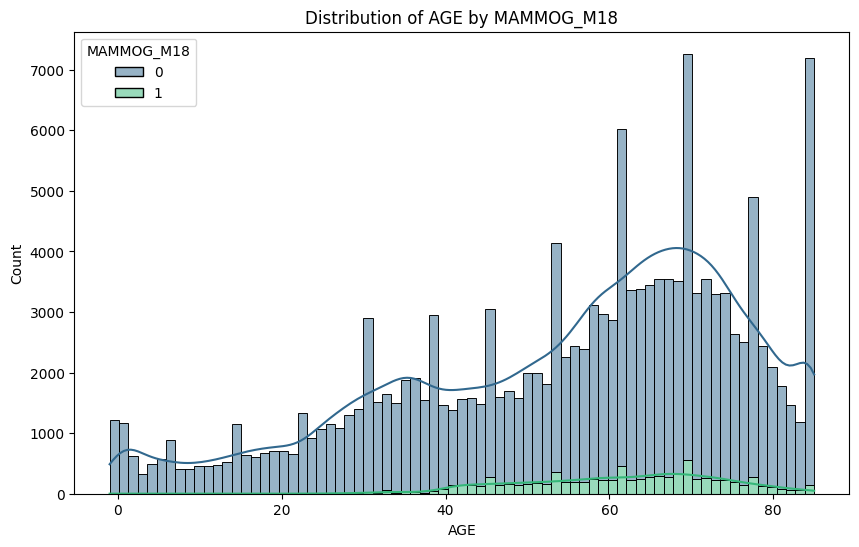

\==================================================\


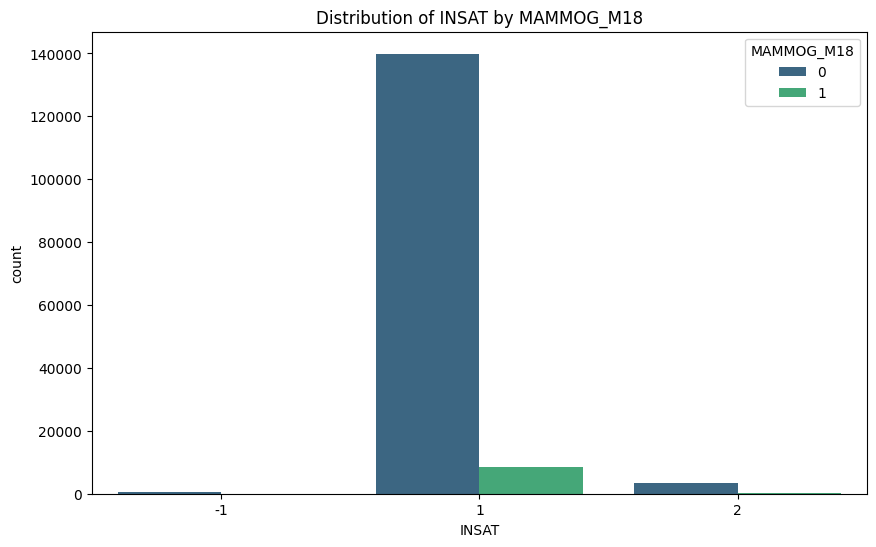

\==================================================\


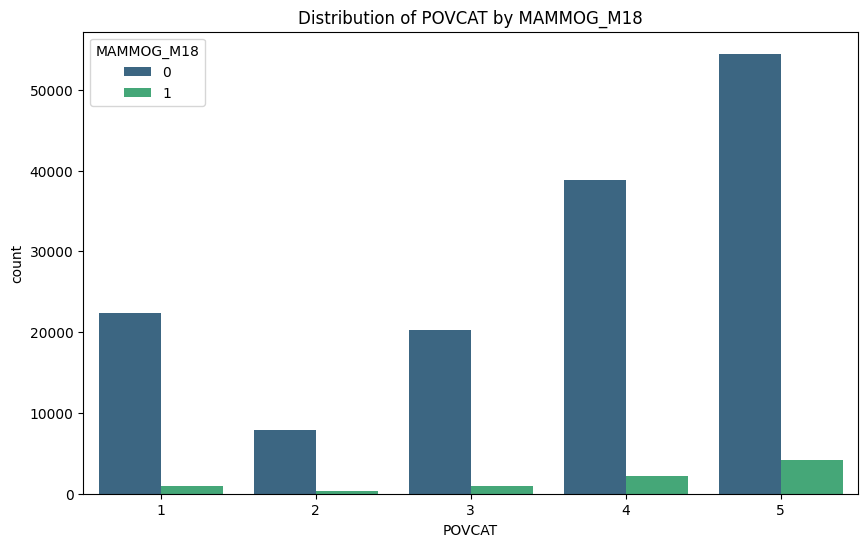

\==================================================\


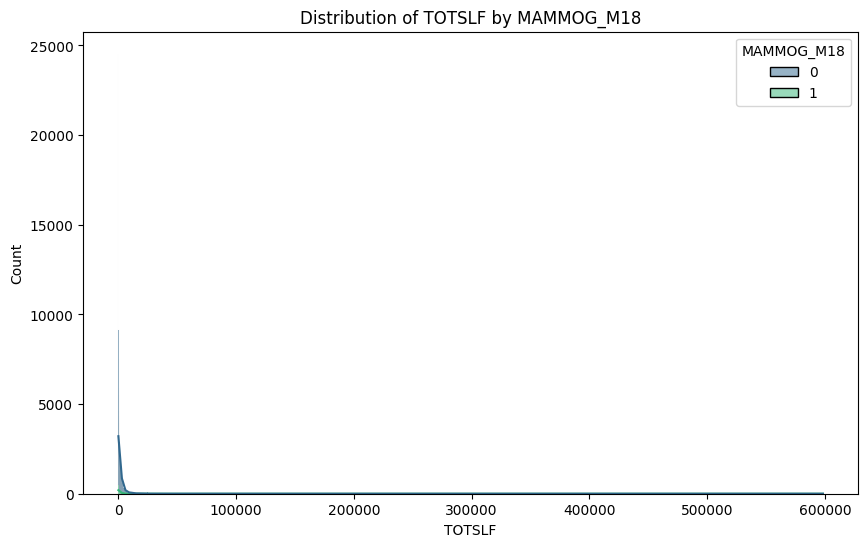

\==================================================\


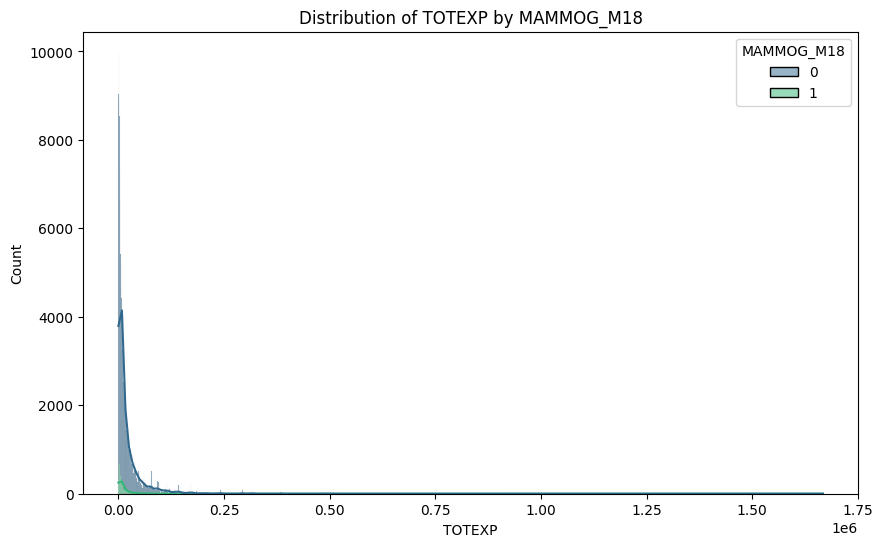

\==================================================\


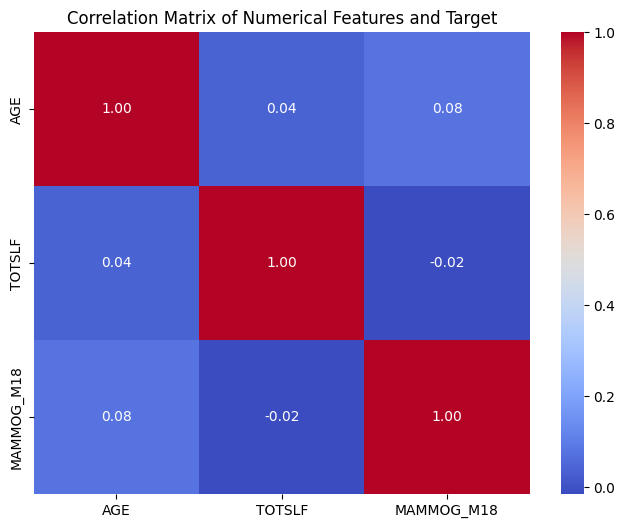

\==================================================\
Descriptive statistics for TOTEXP before transformation:
count    1.523630e+05
mean     2.175714e+04
std      4.242264e+04
min      0.000000e+00
25%      3.223000e+03
50%      8.890000e+03
75%      2.370600e+04
max      1.667510e+06
Name: TOTEXP, dtype: float64
\==================================================\


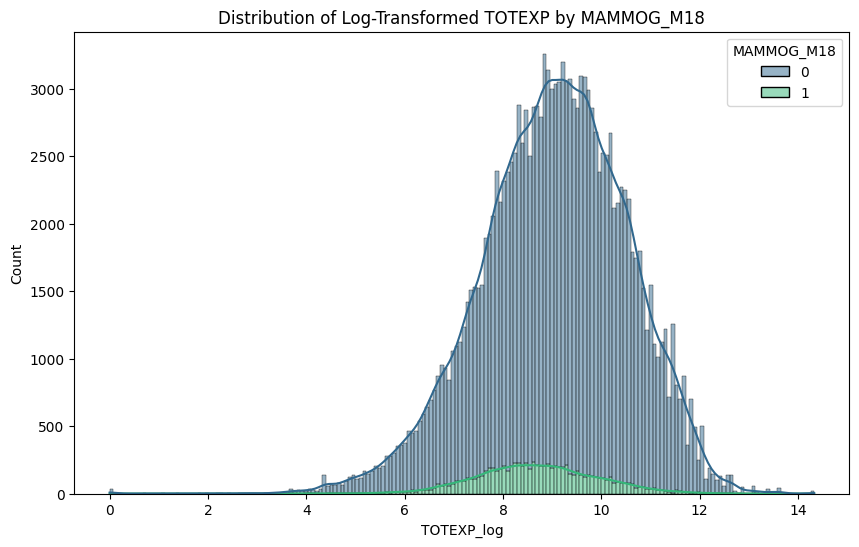

\==================================================\


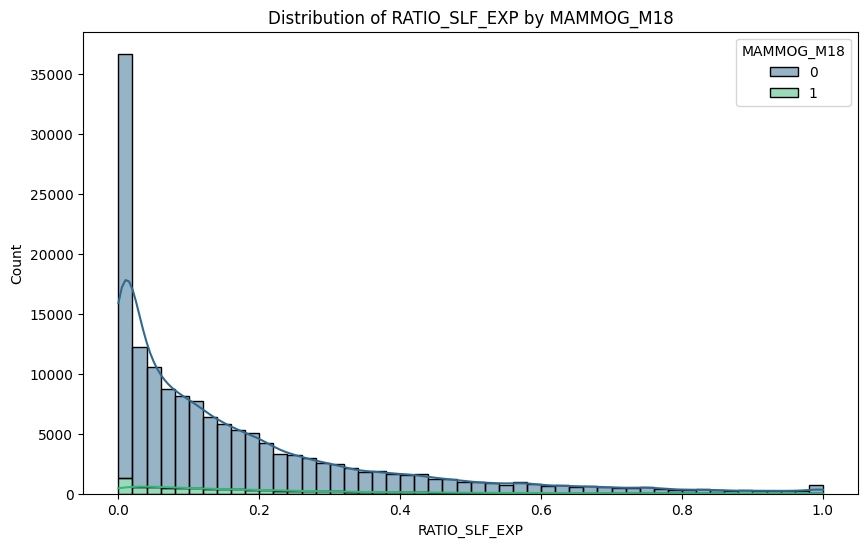

\==================================================\


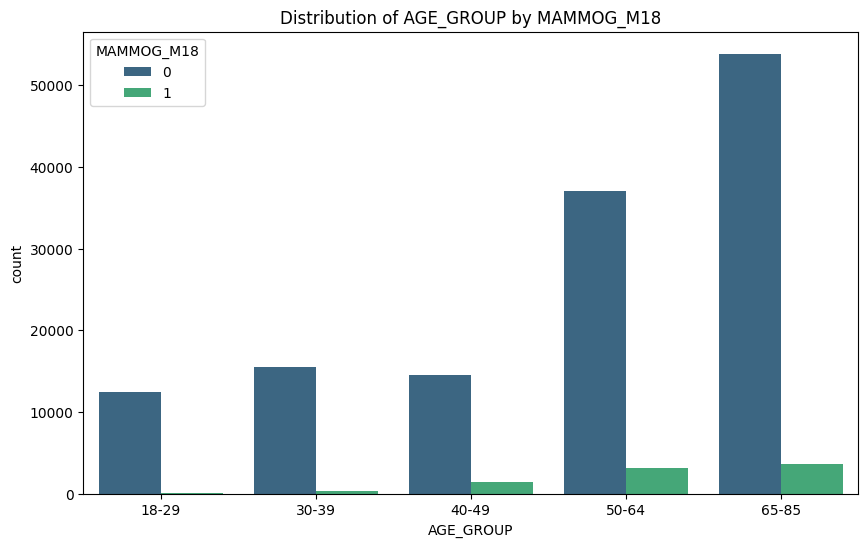

\==================================================\


C:\Users\Afra\AppData\Local\Temp\ipykernel_9856\3105365757.py:97: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if df_corr[col].dtype == 'object' or pd.api.types.is_categorical_dtype(df_corr[col]):


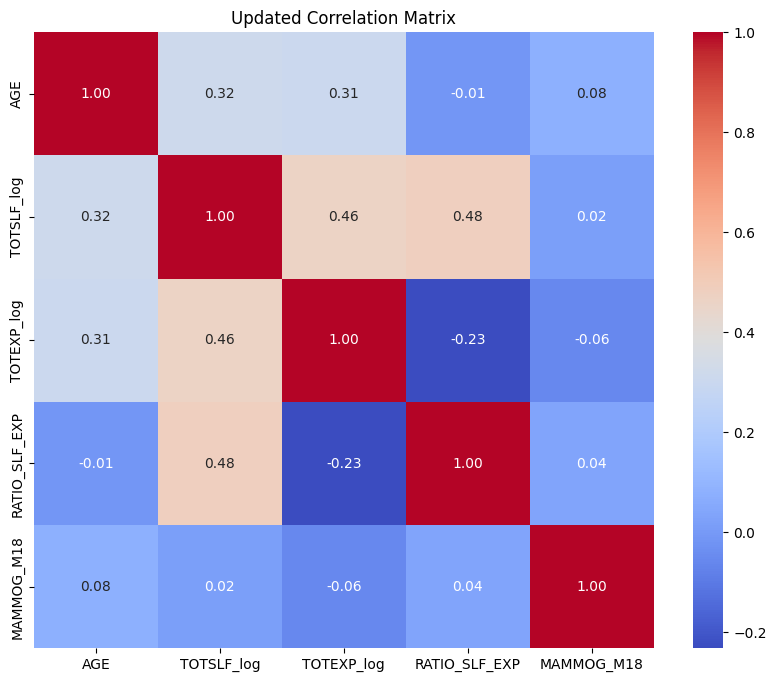

In [23]:
# EDA

# Filter to Females
print("\\" + "="*50 + "\\")
print(f"Shape of df before filtering for Females: {df.shape}")

df_females_only = df[df['SEX'].map({'Male': 1, 'Female': 2}) == 2].copy() if df['SEX'].dtype == object else df[df['SEX'] == 2].copy()
print(f"Shape of df after filtering for Females (df_females_only): {df_females_only.shape}")
print("\\" + "="*50 + "\\")


df_eda = df_females_only[['AGE', 'INSAT', 'POVCAT', 'TOTSLF', 'TOTEXP', 'MAMMOG_M18']].copy()
 
df_eda['MAMMOG_M18'] = df_eda['MAMMOG_M18'].map({1: 1, 2: 0})

# NaN values in the selected columns
print("Missing values in each column of df_eda:")
print(df_eda.isnull().sum())
print("\\" + "="*50 + "\\")      # We dont have any missing values in the selected columns


# Plotting distributions of features
features_to_plot = ['AGE', 'INSAT', 'POVCAT', 'TOTSLF', 'TOTEXP']
target_variable = 'MAMMOG_M18'

for feature in features_to_plot:
    plt.figure(figsize=(10, 6))
    if df_eda[feature].dtype == 'object' or df_eda[feature].nunique() < 10:
        sns.countplot(x=feature, hue=target_variable, data=df_eda, palette='viridis')
        plt.title(f'Distribution of {feature} by {target_variable}')
    else:
        sns.histplot(data=df_eda, x=feature, hue=target_variable, kde=True, multiple="stack", palette='viridis')
        plt.title(f'Distribution of {feature} by {target_variable}')
    plt.show()
    print("\\" + "="*50 + "\\")

# Plotting the correlation matrix
numerical_features_eda = ['AGE', 'TOTSLF']
plt.figure(figsize=(8, 6))
sns.heatmap(df_eda[numerical_features_eda + [target_variable]].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features and Target')
plt.show()

# >>>>>>>>>>>>>>>>>>>> Feature Engineering <<<<<<<<<<<<<<<<<<<<

if 'TOTEXP' in df_eda.columns:
    print("\\" + "="*50 + "\\")
    print("Descriptive statistics for TOTEXP before transformation:")
    print(df_eda['TOTEXP'].describe())
    print("\\" + "="*50 + "\\")

    # Log transformation of TOTEXP
    df_eda['TOTEXP_log'] = np.log1p(df_eda['TOTEXP'])

    # Plotting the distribution of log-transformed TOTEXP
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_eda, x='TOTEXP_log', hue=target_variable, kde=True, multiple="stack", palette='viridis')
    plt.title(f'Distribution of Log-Transformed TOTEXP by {target_variable}')
    plt.show()
    print("\\" + "="*50 + "\\")

    # Creating a new feature RATIO_SLF_EXP
    df_eda['RATIO_SLF_EXP'] = df_eda['TOTSLF'] / (df_eda['TOTEXP'] + 1e-6)

    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_eda, x='RATIO_SLF_EXP', hue=target_variable, kde=True, multiple="stack", palette='viridis', bins=50)
    plt.title(f'Distribution of RATIO_SLF_EXP by {target_variable}')
    plt.show()
    print("\\" + "="*50 + "\\")
else:
    print("Column 'TOTEXP' not found in df_eda.")


# Creating age groups
bins = [18, 30, 40, 50, 65, 85]
labels = ['18-29', '30-39', '40-49', '50-64', '65-85']
df_eda['AGE_GROUP'] = pd.cut(df_eda['AGE'], bins=bins, labels=labels, right=True, include_lowest=True)

plt.figure(figsize=(10, 6))
sns.countplot(x='AGE_GROUP', hue=target_variable, data=df_eda, palette='viridis', order=labels)
plt.title(f'Distribution of AGE_GROUP by {target_variable}')
plt.show()
print("\\" + "="*50 + "\\")

# Ensure TOTSLF_log is computed before use
df_eda['TOTSLF_log'] = np.log1p(df_eda['TOTSLF'])

# Plotting the distribution of AGE_GROUP
numerical_features_eda_final = ['AGE', 'TOTSLF_log']
if 'TOTEXP_log' in df_eda.columns:
    numerical_features_eda_final.append('TOTEXP_log')
if 'RATIO_SLF_EXP' in df_eda.columns:
    numerical_features_eda_final.append('RATIO_SLF_EXP')

df_corr = df_eda[numerical_features_eda_final + [target_variable]].copy()
for col in df_corr.columns:
    if df_corr[col].dtype == 'object' or pd.api.types.is_categorical_dtype(df_corr[col]):
        df_corr.drop(col, axis=1, inplace=True)       # Remove non-numeric columns

if not df_corr.empty and len(df_corr.columns) > 1 :
    plt.figure(figsize=(10, 8))
    sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Updated Correlation Matrix')
    plt.show()

## Machine learning

In [24]:
# create a metrics function to evaluate the model

def evaluate_model(model, X_train, y_train, X_test, y_test, model_name='Model'):
    """
    Evaluates a classification model and displays key metrics,
    a confusion matrix, and an ROC curve.

    model_name (str, optional): Name of the model for display in plot titles and output.
                                Defaults to 'Model'.

    Returns:
    dict: A dictionary containing the model's performance metrics on the test set.
    """

    y_pred_te = model.predict(X_test)
    y_proba_te = model.predict_proba(X_test)[:, 1]

    acc_test = accuracy_score(y_test, y_pred_te)
    precision_test = precision_score(y_test, y_pred_te, zero_division=0)
    recall_test = recall_score(y_test, y_pred_te, zero_division=0)
    f1_test = f1_score(y_test, y_pred_te, zero_division=0)
    roc_auc_test = roc_auc_score(y_test, y_proba_te)

    print(f"--- {model_name} Test Metrics ---")
    print(f"Accuracy: {acc_test:.4f}")
    print(f"Precision: {precision_test:.4f}")
    print(f"Recall (Sensitivity): {recall_test:.4f}")
    print(f"F1-Score: {f1_test:.4f}")
    print(f"ROC AUC: {roc_auc_test:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_te)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{model_name} - Confusion Matrix (Test Set)')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba_te)
    roc_auc_display = auc(fpr, tpr) 
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_display:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    results = {
        'Model': model_name,
        'Accuracy': acc_test,
        'Precision': precision_test,
        'Recall': recall_test,
        'F1-Score': f1_test,
        'ROC AUC': roc_auc_test
    }
    return results

all_results = []

In [25]:
cols = ['AGE', 'SEX', 'INSAT', 'POVCAT', 'TOTSLF', 'TOTEXP', 'MAMMOG_M18']
df_ml = df[cols].dropna()

df_ml = df_ml[df_ml['MAMMOG_M18'].isin([1, 2])].copy()

df_ml['SEX'] = df_ml['SEX'].map({2: 0, 1: 1})

features = ['AGE', 'SEX', 'INSAT', 'POVCAT', 'TOTSLF', 'TOTEXP']
X = df_ml[features]
y = df_ml['MAMMOG_M18'].map({1: 1, 2: 0})

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Classification

In [26]:
from sklearn.neighbors import KNeighborsClassifier

--- KNN Test Metrics ---
Accuracy: 0.9007
Precision: 0.9066
Recall (Sensitivity): 0.8940
F1-Score: 0.9002
ROC AUC: 0.9601


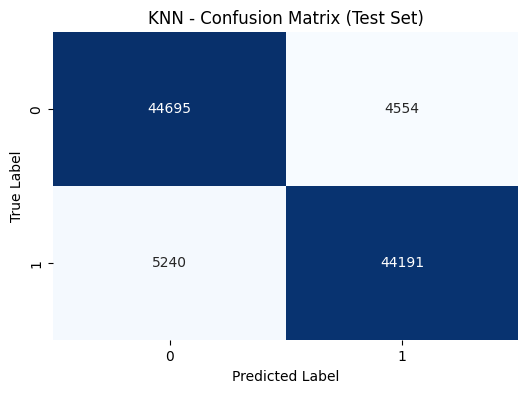

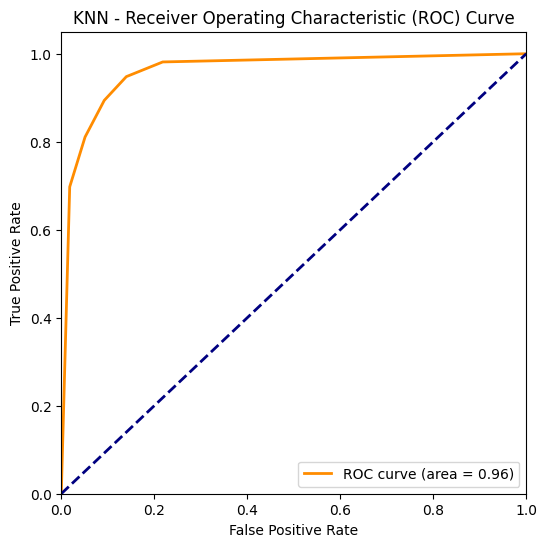

In [27]:
# K-Nearest Neighbors Classifier (KNN)

KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)

y_pred_tr = KNN.predict(X_train)
y_pred_te = KNN.predict(X_test)

KNN_results = evaluate_model(KNN, X_train, y_train, X_test, y_test, 'KNN')

all_results.append(KNN_results)

--- ANN Test Metrics ---
Accuracy: 0.8068
Precision: 0.7479
Recall (Sensitivity): 0.9267
F1-Score: 0.8277
ROC AUC: 0.8780


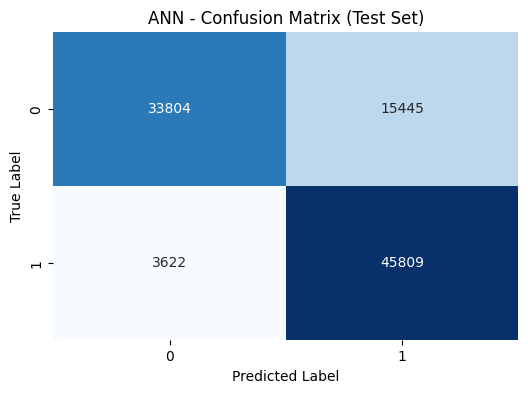

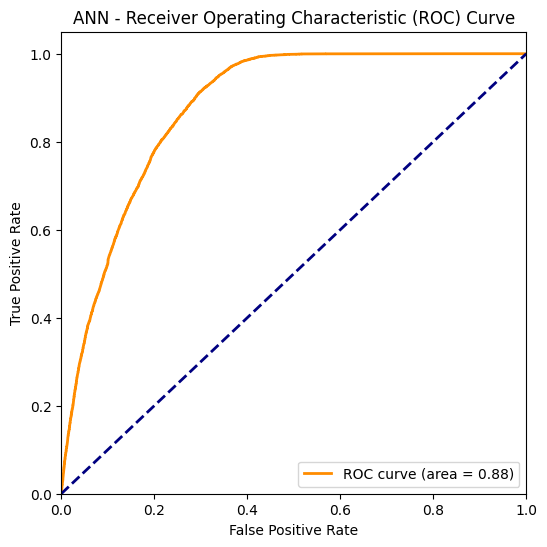

In [28]:
# Neural Network Classifier (ANN)

ANN = MLPClassifier(hidden_layer_sizes=64, max_iter=700 , random_state=42)
ANN.fit(X_train, y_train)

y_pred_tr = ANN.predict(X_train)
y_pred_te = ANN.predict(X_test)

ANN_results = evaluate_model(ANN, X_train, y_train, X_test, y_test, 'ANN')

all_results.append(ANN_results)

--- RandomForest Test Metrics ---
Accuracy: 0.9281
Precision: 0.8992
Recall (Sensitivity): 0.9647
F1-Score: 0.9308
ROC AUC: 0.9784


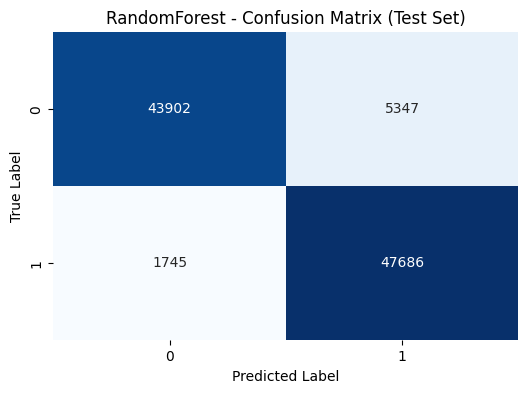

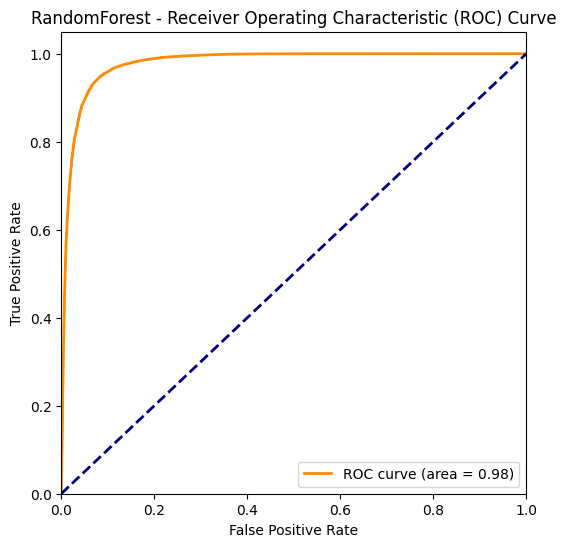

In [29]:
# Random Forest

rf = RandomForestClassifier(max_depth=64 , min_samples_split=16 , min_samples_leaf=4)
rf.fit(X_train, y_train)

y_pred_tr = rf.predict(X_train)
y_pred_te = rf.predict(X_test)

rf_results = evaluate_model(rf, X_train, y_train, X_test, y_test, 'RandomForest')

all_results.append(rf_results)

--- Logistic Regression Test Metrics ---
Accuracy: 0.7745
Precision: 0.7034
Recall (Sensitivity): 0.9508
F1-Score: 0.8086
ROC AUC: 0.7816


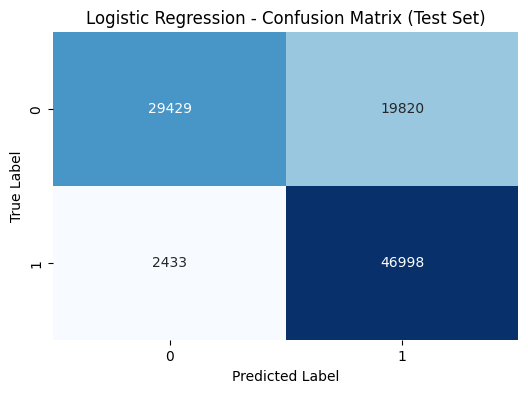

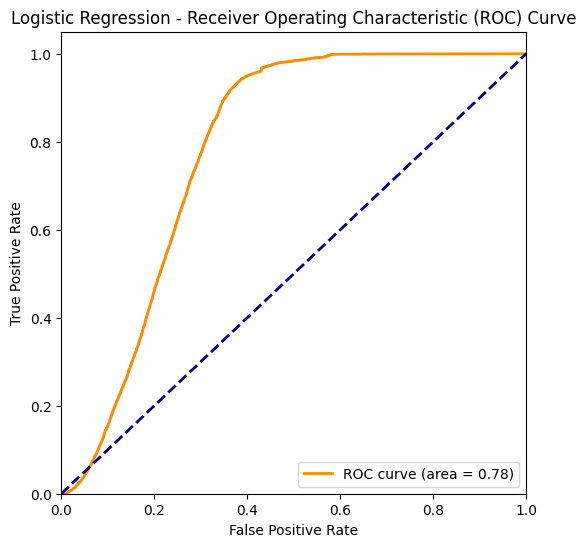

In [30]:
# Logistic Regression

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

y_pred_tr = lr.predict(X_train)
y_pred_te = lr.predict(X_test)

lr_results = evaluate_model(lr, X_train, y_train, X_test, y_test, 'Logistic Regression')

all_results.append(lr_results)

--- XGBoost Test Metrics ---
Accuracy: 0.9482
Precision: 0.9383
Recall (Sensitivity): 0.9597
F1-Score: 0.9489
ROC AUC: 0.9847


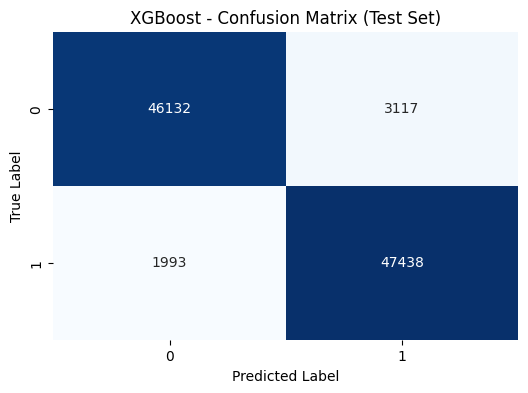

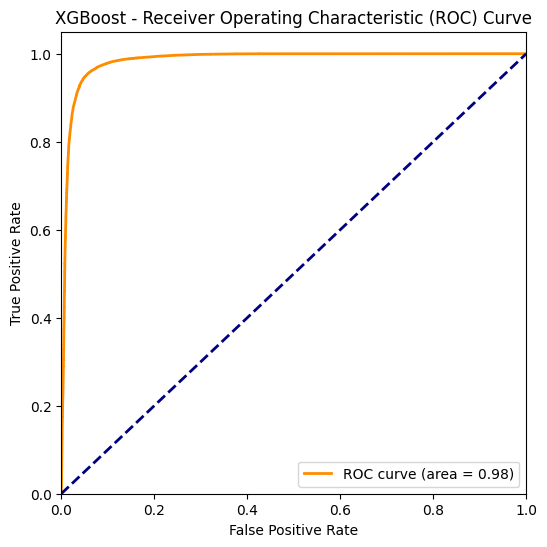

In [31]:
# XGBoost

xgb = Xgb.XGBClassifier(max_depth=16, n_estimators=1000, learning_rate=0.1)
xgb.fit(X_train, y_train)

y_pred_tr = xgb.predict(X_train)
y_pred_te = xgb.predict(X_test)

xgb_results = evaluate_model(xgb, X_train, y_train, X_test, y_test, 'XGBoost')

all_results.append(xgb_results)

In [32]:
results_df = pd.DataFrame(all_results)
results_df = results_df.drop_duplicates(subset=['Model'], keep='last')
print(results_df.sort_values(by='ROC AUC', ascending=False))

                 Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
4              XGBoost  0.948216   0.938344  0.959681  0.948893  0.984730
2         RandomForest  0.928131   0.899176  0.964698  0.930785  0.978406
0                  KNN  0.900750   0.906575  0.893994  0.900240  0.960144
1                  ANN  0.806779   0.747853  0.926726  0.827736  0.878030
3  Logistic Regression  0.774493   0.703373  0.950780  0.808575  0.781552


--- RandomForest Feature Importances ---
SEX       0.320044
AGE       0.248270
TOTEXP    0.220839
TOTSLF    0.166833
POVCAT    0.035888
INSAT     0.008125
dtype: float64


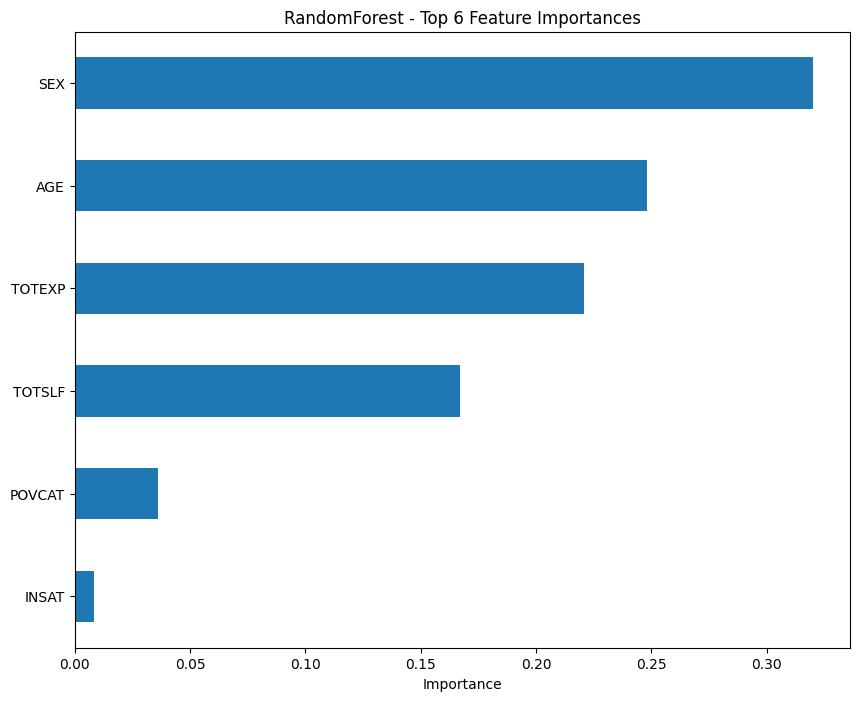

\--- XGBoost Feature Importances ---
SEX       0.978077
INSAT     0.012335
AGE       0.003210
POVCAT    0.002351
TOTEXP    0.002173
TOTSLF    0.001854
dtype: float32


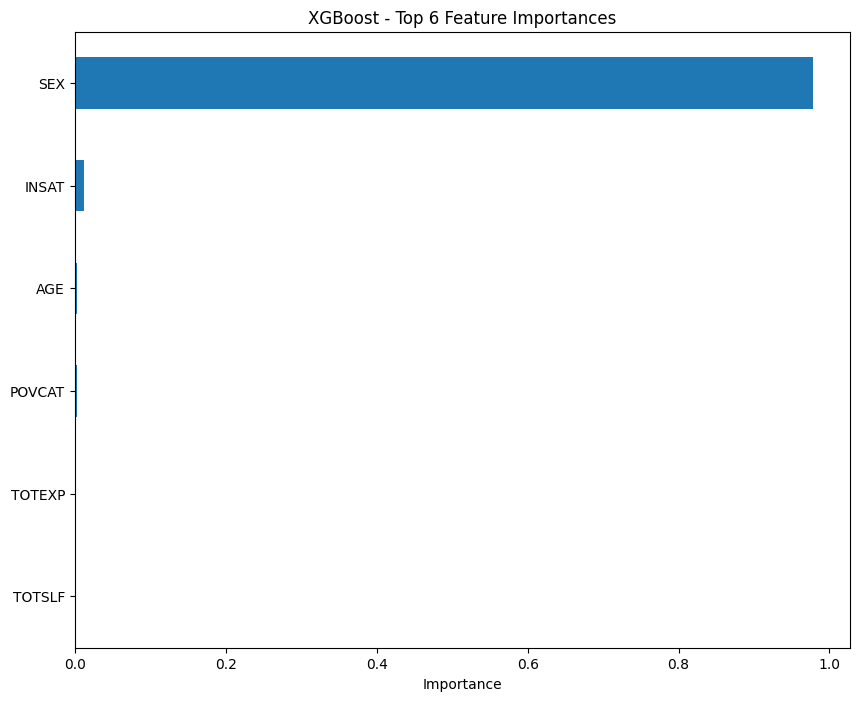

In [34]:
# Feature Importance Plotting

# RandomForest Feature Importance Plotting
importances_rf = rf.feature_importances_
feature_names_rf = features  # ['AGE', 'SEX', 'INSAT', 'POVCAT', 'TOTSLF', 'TOTEXP']

forest_importances_rf = pd.Series(importances_rf, index=feature_names_rf)
sorted_importances_rf = forest_importances_rf.sort_values(ascending=False)

print("--- RandomForest Feature Importances ---")
print(sorted_importances_rf.head(6))

plt.figure(figsize=(10, 8))
sorted_importances_rf.head(6).plot(kind='barh')
plt.title("RandomForest - Top 6 Feature Importances")
plt.xlabel("Importance")
plt.gca().invert_yaxis() 
plt.show()

# XGBoost Feature Importance Plotting
importances_xgb = xgb.feature_importances_
feature_names_xgb = features  # ['AGE', 'SEX', 'INSAT', 'POVCAT', 'TOTSLF', 'TOTEXP']

forest_importances_xgb = pd.Series(importances_xgb, index=feature_names_xgb)
sorted_importances_xgb = forest_importances_xgb.sort_values(ascending=False)

print("\\--- XGBoost Feature Importances ---")
print(sorted_importances_xgb.head(6))

plt.figure(figsize=(10, 8))
sorted_importances_xgb.head(6).plot(kind='barh')
plt.title("XGBoost - Top 6 Feature Importances")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.show()

## Conclusion

This project aimed to identify key factors influencing mammography screening uptake by applying various machine learning algorithms to the MEPS 2019-2022 dataset. The analysis included both male and female respondents, and the models were trained using six core features: `AGE`, `SEX`, `INSAT` (insurance status), `POVCAT` (poverty category), `TOTSLF` (out-of-pocket expenditures), and `TOTEXP` (total expenditures).

Among the five classification models evaluated (K-Nearest Neighbors, Artificial Neural Network/MLP, RandomForest, Logistic Regression, and XGBoost), the **XGBoost classifier demonstrated the best overall performance on the test set**, achieving a **ROC AUC of 0.9847** and an **F1-Score of 0.9488**. The RandomForest model also showed strong, comparable results with a ROC AUC of 0.9784 and an F1-Score of 0.93. These models effectively utilized `SMOTE` for handling class imbalance and `StandardScaler` for feature scaling.

Feature importance analysis from both XGBoost and RandomForest consistently highlighted the significance of the following original features:
* **`SEX`**:  Emerged as the most dominant predictor in both models.
* **`TOTSLF` (Out-of-Pocket Expenditures)** and **`TOTEXP` (Total Expenditures)**: Both financial metrics showed high importance, indicating the strong influence of healthcare costs.
* **`POVCAT` (Poverty Category/Income Level)** and **`INSAT` (Insurance Status)**: These socioeconomic factors were also identified as significant determinants.
* **`AGE`**:This feature also contributed to the predictions, with its relative importance varying between the two ensemble models.

The findings underscore that the decision to undergo mammography is influenced by a complex interplay of these demographic, socioeconomic, and financial factors. While direct "insurance franchise" data was not part of the input features for the final models, the importance of out-of-pocket costs (`TOTSLF`) and total expenditures (`TOTEXP`) suggests that financial considerations for patients are critical.

It is important to note that while several engineered features (such as log-transformed costs, age groups, and cost ratios) were explored during the Exploratory Data Analysis (EDA) phase, they were not incorporated into the final set of features used for training the machine learning models presented here. The reported performance and feature importances are based on the six original features.

## Discussion and Future Work

The consistent identification of age, financial metrics, income level, insurance status, and sex as key predictors by robust ensemble models like XGBoost and RandomForest provides valuable insights. The strong predictive power of `AGE` aligns with established medical guidelines for mammography screening. The significance of cost-related features (`TOTSLF`, `TOTEXP`) and socioeconomic indicators (`POVCAT`, `INSAT`) highlights existing disparities and barriers in accessing preventive healthcare services. Understanding these factors is crucial for developing targeted public health interventions.

**Limitations of the current study include:**
* **Exclusion of Engineered Features in Final Models:** The engineered features developed during EDA (e.g., `TOTSLF_log`, `RATIO_SLF_EXP`, `AGE_GROUP`), which showed potential during exploratory analysis, were not used in the final model training. Incorporating these could potentially enhance model performance and provide more nuanced insights.
* **No Hyperparameter Tuning:** The models were trained with default or manually set hyperparameters. Rigorous hyperparameter optimization could further improve their predictive capabilities.
* **Direct Franchise Data:** The dataset did not contain direct information on insurance franchise levels, limiting the ability to directly quantify its impact. The cost features serve as proxies.

**Future Work could focus on:**
1.  **Incorporating Engineered Features:** Re-train and evaluate the models using the engineered features (e.g., `TOTSLF_log`, `TOTEXP_log`, `RATIO_SLF_EXP`, and one-hot encoded `AGE_GROUP`, `POVCAT`, `INSAT`) to assess their impact on performance and derive potentially richer feature importances.
2.  **Female-Specific Analysis:** Conduct a separate analysis focused exclusively on female respondents, as mammography is predominantly a female-centric screening, to see if factor importance shifts.
3.  **Hyperparameter Optimization:** Employ techniques like GridSearchCV or RandomizedSearchCV to find optimal hyperparameters for the top-performing models (XGBoost, RandomForest).
4.  **Advanced Interpretability:** Utilize tools like SHAP or LIME to gain deeper, instance-level insights into model predictions.
5.  **Exploring Other Data Sources:** If available, integrate data sources that provide more granular details on insurance plan structures, deductibles, and co-payments.
6.  **Causal Inference:** With appropriate longitudinal data and study design, explore causal relationships between policy changes (e.g., in insurance coverage or cost-sharing) and mammography rates.

This project provides a solid foundation for understanding the multifaceted drivers of mammography utilization. The next steps in refining the models and deepening the analysis hold the potential to yield even more actionable insights for public health.